In [6]:
import numpy as np
import tensorflow as tf
import PIL.Image
import IPython.display as ip_disp
from cStringIO import StringIO
import special_augmentations


In [10]:
#function for displaying images, taken from larger codebase
def display_img_array(*img_arrays, **kwargs):
    fmt = kwargs['fmt'] if 'fmt' in kwargs else 'jpeg'
    imgs = []
    for img_array in img_arrays:
        img_array = np.uint8(img_array)
        f = StringIO()
        PIL.Image.fromarray(img_array).save(f, fmt)
        img = ip_disp.Image(data=f.getvalue())
        imgs.append(img)
    ip_disp.display(*imgs)

In [21]:
#load four example images, taken from ImageNet
imgs = np.load('./example_imgs.npy')
imgs.shape

(4, 224, 224, 3)

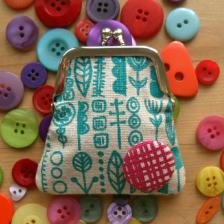

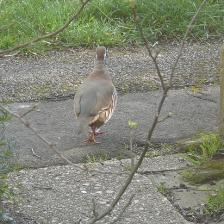

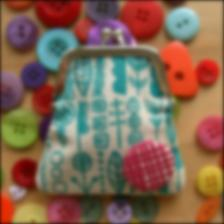

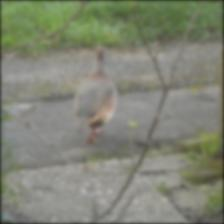

In [23]:
reload(special_augmentations)
#arguments: image, and severity of augmentation from 1 to 5
blurred_imgs = special_augmentations.gaussian_blur(imgs, 2)
#this function takes in a batch of images, as the kernel convolutions are done on GPU
sess = tf.Session()
blur0 = sess.run(blurred_imgs[0])
blur1 = sess.run(blurred_imgs[1])

#display the unblurred and the blurred images
display_img_array(imgs[0],imgs[1],blur0, blur1)

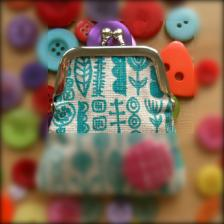

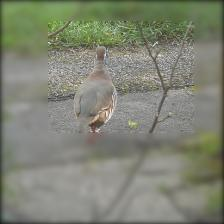

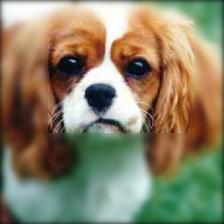

In [51]:
#This function blurs all of the image except for a rectangle whose min and max height and width is specified. 
#The rectangle is then randomly generated with dimensions in this range.
reload(special_augmentations)
#Minor hack here, the input to this function takes in tf tensors and not numpy arrays
tf_imgs = tf.stack([imgs[0], imgs[1], imgs[2], imgs[3]], 0)

blurred_except_block = special_augmentations.blur_except_block(tf_imgs, min_block_size=20, max_block_size=150, 
                                                               severity=3)
sess = tf.Session()
blurred_except_block = sess.run(blurred_except_block)

display_img_array(blurred_except_block[0], blurred_except_block[1], blurred_except_block[2])

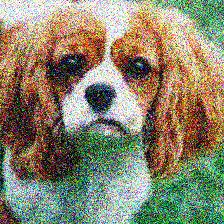

In [47]:
reload(special_augmentations)
noisy_img = special_augmentations.gaussian_noise(imgs[2], 4)

sess = tf.Session()
noisy_img = sess.run(noisy_img)

display_img_array(noisy_img)